In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os.path as path
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from matplotlib import style
style.use('seaborn')
%config InlineBackend.figure_format = 'svg'

In [2]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', -1)

In [3]:
dataframe = pd.read_csv("C:\\l3\\students_data.csv")
dataframe.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,1,1,4,5,12,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,3,3,2,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4,4,5,3,5,5,0,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4,4,3,1,1,3,4,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,4,5,2,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3,3,4,4,5,4,2,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1,5,1,3,5,5,0,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,4,4,1,1,5,10,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3,4,5,1,2,5,4,9,10,11


In [4]:
 pd.read_csv('C:\\l3\\students_data_features.csv',delimiter=';',encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(dataframe.address)
dataframe["address_le"] = le.transform(dataframe.address)
dataframe.drop(["address"],axis=1, inplace=True)

le.fit(dataframe.sex)
dataframe["sex_le"] = le.transform(dataframe.sex)
dataframe.drop(["sex"],axis=1, inplace=True)

le.fit(dataframe.school)
dataframe["school_le"] = le.transform(dataframe.school)
dataframe.drop(["school"],axis=1, inplace=True)

le.fit(dataframe.Subject)
dataframe["subject_le"] = le.transform(dataframe.Subject)
dataframe.drop(["Subject"],axis=1, inplace=True)

le.fit(dataframe.famsize)
dataframe["famsize_le"] = le.transform(dataframe.famsize)
dataframe.drop(["famsize"],axis=1, inplace=True)

le.fit(dataframe.Pstatus)
dataframe["Pstatus_le"] = le.transform(dataframe.Pstatus)
dataframe.drop(["Pstatus"],axis=1, inplace=True)

le.fit(dataframe.Mjob)
dataframe["Mjob_le"] = le.transform(dataframe.Mjob)
dataframe.drop(["Mjob"],axis=1, inplace=True)

le.fit(dataframe.Fjob)
dataframe["Fjob_le"] = le.transform(dataframe.Fjob)
dataframe.drop(["Fjob"],axis=1, inplace=True)

le.fit(dataframe.reason)
dataframe["reason_le"] = le.transform(dataframe.reason)
dataframe.drop(["reason"],axis=1, inplace=True)

le.fit(dataframe.guardian)
dataframe["guardian_le"] = le.transform(dataframe.guardian)
dataframe.drop(["guardian"],axis=1, inplace=True)

le.fit(dataframe.schoolsup)
dataframe["schoolsup_le"] = le.transform(dataframe.schoolsup)
dataframe.drop(["schoolsup"],axis=1, inplace=True)

le.fit(dataframe.famsup)
dataframe["famsup_le"] = le.transform(dataframe.famsup)
dataframe.drop(["famsup"],axis=1, inplace=True)

le.fit(dataframe.paid)
dataframe["paid_le"] = le.transform(dataframe.paid)
dataframe.drop(["paid"],axis=1, inplace=True)

le.fit(dataframe.activities)
dataframe["activities_le"] = le.transform(dataframe.activities)
dataframe.drop(["activities"],axis=1, inplace=True)

le.fit(dataframe.nursery)
dataframe["nursery_le"] = le.transform(dataframe.nursery)
dataframe.drop(["nursery"],axis=1, inplace=True)

le.fit(dataframe.higher)
dataframe["higher_le"] = le.transform(dataframe.higher)
dataframe.drop(["higher"],axis=1, inplace=True)

le.fit(dataframe.internet)
dataframe["internet_le"] = le.transform(dataframe.internet)
dataframe.drop(["internet"],axis=1, inplace=True)

le.fit(dataframe.romantic)
dataframe["romantic_le"] = le.transform(dataframe.romantic)
dataframe.drop(["romantic"],axis=1, inplace=True)

dataframe.drop(["G2"], axis = 1, inplace = True)

#Переместим целевую переменную в конец dataframe для дальнейшего удобства представления данных
dataframe["g3"] = dataframe.G3
dataframe.drop(["G3"], axis = 1, inplace = True)
dataframe.head(20)


,ID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,address_le,sex_le,school_le,subject_le,famsize_le,Pstatus_le,Mjob_le,Fjob_le,reason_le,guardian_le,schoolsup_le,famsup_le,paid_le,activities_le,nursery_le,higher_le,internet_le,romantic_le,g3
0,100097,16,3,4,1,1,0,3,2,1,1,4,5,12,15,1,0,0,1,0,0,3,2,0,0,0,0,0,0,1,1,1,0,14
1,101021,17,3,2,1,2,0,5,3,4,1,3,3,2,17,1,0,0,1,0,1,2,2,0,1,0,0,0,1,0,1,1,0,17
2,102965,16,1,2,2,1,2,4,4,5,3,5,5,0,9,1,1,0,1,1,1,1,3,0,1,0,0,0,0,0,1,1,0,10
3,102989,17,2,3,2,2,0,4,4,3,1,1,3,4,14,1,1,1,1,0,1,2,3,1,0,0,0,0,1,1,1,1,0,16
4,103131,16,1,1,2,1,0,4,3,2,1,4,5,2,12,1,0,0,1,0,1,0,2,1,1,0,1,0,0,1,1,0,0,13
5,103144,18,3,1,2,1,0,3,3,4,4,5,4,2,11,1,1,0,1,1,1,3,3,0,1,0,0,0,1,1,1,1,1,12
6,105257,18,1,1,2,2,0,1,1,1,1,1,5,6,11,1,0,1,1,0,1,2,2,0,1,0,0,0,1,1,1,0,0,9
7,107639,15,4,4,2,1,0,1,5,1,3,5,5,0,13,0,0,1,1,0,1,4,2,0,1,0,0,0,0,1,1,1,1,14
8,107914,15,3,2,1,2,0,4,4,4,1,1,5,10,7,1,0,0,0,1,1,3,2,3,1,0,1,1,0,1,1,1,0,6
9,108089,16,3,4,3,2,0,3,4,5,1,2,5,4,9,0,1,1,1,0,1,2,1,2,1,0,0,0,0,0,1,0,0,11


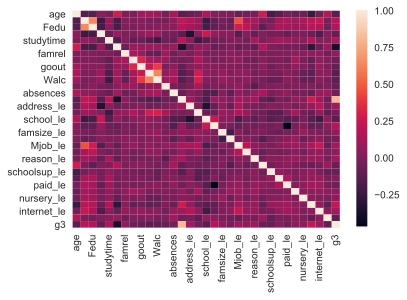

In [6]:
X = dataframe.drop(["ID"],axis=1).values[:,0:len(dataframe.drop(["ID"],axis=1).columns)-1]# Данные
Y = dataframe.drop(["ID"],axis=1).values[:,len(dataframe.drop(["ID"],axis=1).columns)-1] # Целевая переменная 
sns.heatmap(dataframe.drop(["ID"],axis=1).corr())

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()

model.fit(X, Y)

cols = dataframe.drop(["ID"],axis=1).columns[:len(dataframe.drop(["ID"],axis=1).columns)-1]

df = pd.DataFrame()
df["features"] = cols
df["weights"] = model.feature_importances_
df = df.sort_values(by="weights",ascending = False)

df

C:\Users\mvide\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,features,weights
13,G1,0.113367
12,absences,0.056434
17,subject_le,0.043244
7,freetime,0.039794
0,age,0.039588
11,health,0.038619
20,Mjob_le,0.038150
8,goout,0.038020
10,Walc,0.037245
1,Medu,0.036425


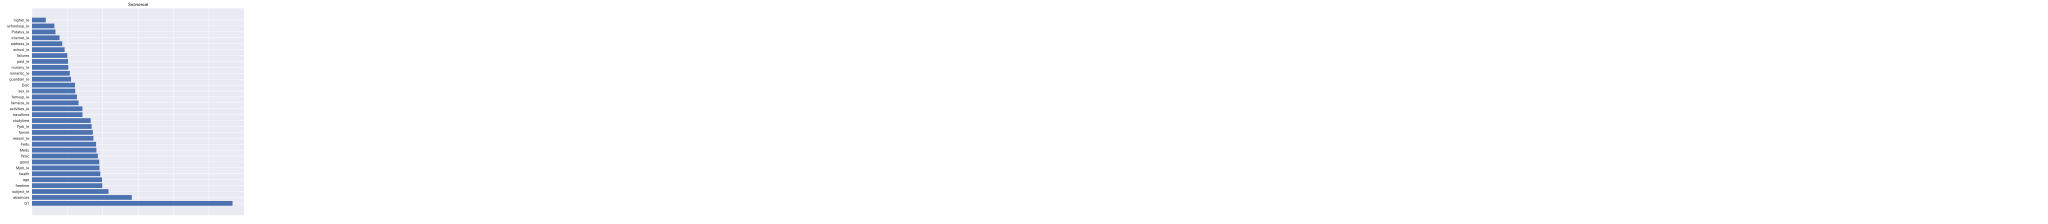

In [8]:
grad = pd.DataFrame({'weights' : df["weights"], 'features': df["features"]})

plt.figure(figsize=(10, 10))

weights = grad.weights[grad.weights > 0]
features = grad.features[grad.weights > 0]
pos = np.arange(len(df["weights"]))

plt.title('Значение')
plt.barh(pos, df["weights"])
for p, c, ch in zip(pos, features, weights):
    plt.annotate(str(ch), xy=(ch + 1, p + .5), va='center')

#customize ticks
ticks = plt.yticks(pos, features)
xt = plt.xticks()[0]
plt.xticks(xt, [' '] * len(xt))


plt.grid(axis = 'x', color ='white', linestyle='-')

plt.show()

In [9]:
# уберем малозначимые признаки
flag = 0
for i in range(len(df.values)):
    if(flag < 0.8):
        flag = flag + df["weights"][i]
    else: 
        break 
print(i)

# отобразим их
df = df.iloc[23:]
print(df)
#и удалим 
dataframe.drop([x for x in df["features"]], axis=1, inplace=True)

23
        features   weights
28  nursery_le    0.020524
26  paid_le       0.020367
5   failures      0.019998
16  school_le     0.018442
14  address_le    0.017120
30  internet_le   0.015579
19  Pstatus_le    0.013292
24  schoolsup_le  0.012673
29  higher_le     0.007806


In [10]:
# Регрессия

In [11]:
# разобьем на 2 группы по предметам
mask = dataframe["subject_le"] == 1
data_por,data_math = dataframe[mask], dataframe[~mask]
noG1_math= data_math.copy().drop(['G1'],axis=1)
noG1_por = data_por.copy().drop(['G1'],axis=1)

In [12]:
# Линейная
# Удалим столбец с предметом, для нас он не несет никакой смысловой нагрузки 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics


def linear_regression(dataset,name):
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['g3','subject_le','ID'], axis=1),
                                                dataset['g3'], test_size=0.33, random_state=42)
    model = linear_model.LinearRegression()
    model.fit(trainData, trainLabels)
    prediction = model.predict(testData)

    MSE = metrics.mean_squared_error(y_pred=prediction, y_true=testLabels) #чем ниже значение MSE, тем выше качество модели 
    RMSE = np.sqrt(MSE)
    MAE = metrics.mean_absolute_error(y_pred=prediction, y_true=testLabels)
    MEDIAN = metrics.median_absolute_error(y_pred=prediction, y_true=testLabels)
    R2 = metrics.r2_score(y_pred=prediction, 
                          y_true=testLabels)
    print(name+" Metrics:")
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedae: {}".format(MSE, RMSE, R2, MAE, MEDIAN))
    return prediction

In [13]:
por_lin = linear_regression(data_por.copy(),"Portugal")
noG1_math_lin = linear_regression(noG1_math.copy(),"\n\nMath noG1")

Portugal Metrics:
MSE:   2.4242058044875536
RMSE:  1.5569861285469289
R2:    0.7561041729695743
MAE:   1.0754662721379418
Medae: 0.8134130358505534


Math noG1 Metrics:
MSE:   19.342347259097032
RMSE:  4.397993549233222
R2:    -0.010656696058764181
MAE:   3.407691028139801
Medae: 2.818607307732565


In [14]:
#Гребневая
def ridge_regression(dataset,name):
    from sklearn.metrics import mean_squared_error
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['g3','subject_le','ID'], axis=1),
                                                dataset['g3'],
                                                test_size=0.33, 
                                                random_state=42)

    #Cross-validation 
    ridgeModel = linear_model.RidgeCV(alphas=np.array(range(0, 50, 1))/10, 
                                  cv=5,
                                 scoring='neg_mean_squared_error')
    
    ridgeModel.fit(trainData, trainLabels)
    
    prediction = ridgeModel.predict(testData)

    # Изобразим на графике двумя кривыми, тестовую выборку и предсказанные результаты

    plt.plot(testLabels[1:100].values, 'b-', label='Correct')
    plt.xlabel("Test observations  <Ridge> " + name)
    plt.ylabel("Marks")
    plt.legend(loc='best')
    plt.show()

    plt.plot(prediction[1:100], 'r-', label='Predicted')
    plt.xlabel("Predicted observations <Ridge> " + name)
    plt.ylabel("Marks")
    plt.legend(loc='best')
    plt.show()

    plt.plot(prediction[1:100], 'r-', label='Predicted')
    plt.plot(testLabels[1:100].values, 'b-', label='Correct')
    plt.xlabel("Observations  <Ridge> ")
    plt.ylabel("Marks")
    plt.legend(loc='best')
    plt.show()
    # Рассчитаем основные метрики 
    MSE = metrics.mean_squared_error(y_pred=prediction, 
                                     y_true=testLabels) #чем ниже значение MSE, тем выше качество модели 

    RMSE = np.sqrt(MSE)

    MAE = metrics.mean_absolute_error(y_pred=prediction, 
                                      y_true=testLabels)

    MEDIAN = metrics.median_absolute_error(y_pred=prediction, 
                                          y_true=testLabels)

    R2 = metrics.r2_score(y_pred=prediction, 
                          y_true=testLabels) # Чем лучше данная метрика к 1, тем лучше качество модели
    print(name+" Metrics:")
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedae: {}".format(MSE, RMSE, R2, MAE, MEDIAN))
    return prediction

C:\Users\mvide\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


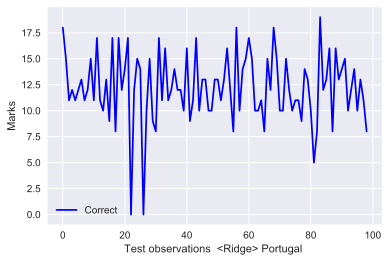

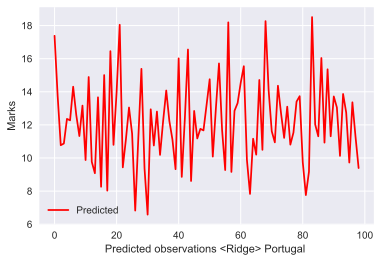

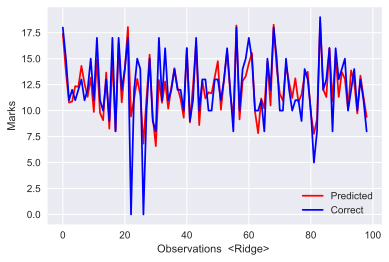

Portugal  Metrics:
MSE:   2.4197882098375505
RMSE:  1.5555668451845939
R2:    0.7565486207547638
MAE:   1.0742511491188658
Medae: 0.8333316680343206


C:\Users\mvide\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


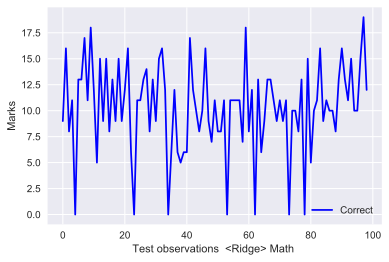

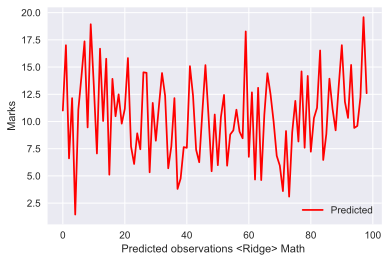

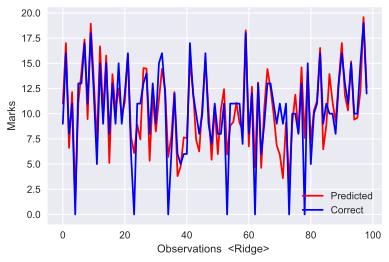

Math  Metrics:
MSE:   5.8775748429424315
RMSE:  2.424371020067356
R2:    0.6928909251790769
MAE:   1.8125799027607146
Medae: 1.4808015890264432


In [15]:
# Гребневая регрессия на португальцах 
portugal_ridge = ridge_regression(data_por.copy(),"Portugal ")

math_ridge = ridge_regression(data_math.copy(),"Math ")

C:\Users\mvide\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


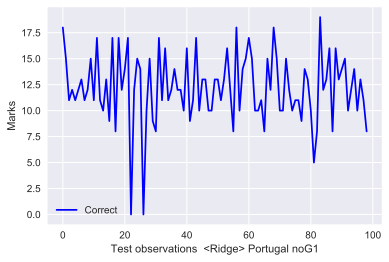

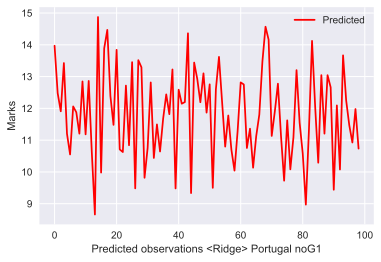

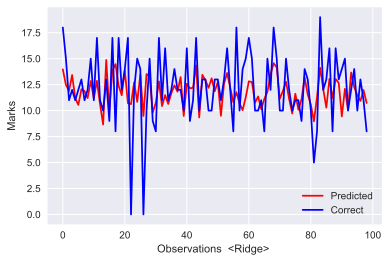

Portugal noG1 Metrics:
MSE:   7.821279338323046
RMSE:  2.7966550266922527
R2:    0.21311243908207833
MAE:   2.0541701915309463
Medae: 1.4991379740046238


C:\Users\mvide\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


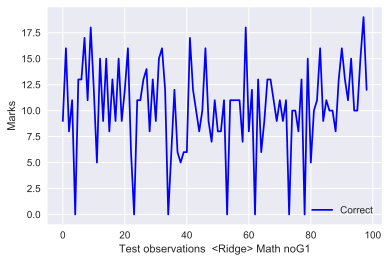

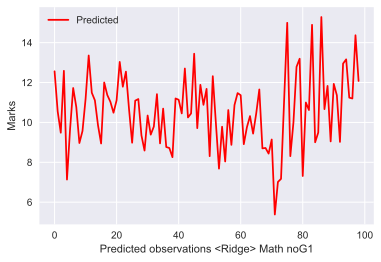

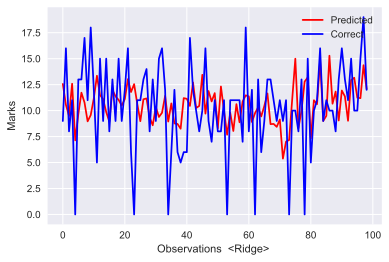

Math noG1 Metrics:
MSE:   19.130795495561927
RMSE:  4.37387648380266
R2:    0.0003970919596077982
MAE:   3.3922203633549115
Medae: 2.8645303284089714


In [16]:
noG1_por_ridge = ridge_regression(noG1_por.copy(),"Portugal noG1")

noG1_math_ridge = ridge_regression(noG1_math.copy(),"Math noG1")

In [17]:
#KNN
from sklearn import preprocessing
def KNN(dataset,name):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.model_selection import KFold
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['g3','subject_le','ID'], axis=1),
                                                dataset['g3'],
                                                test_size=0.33, 
                                                random_state=42)

    

    kf = KFold(n_splits=5, shuffle=True)
    kf.get_n_splits(trainData)

    knrModel = KNeighborsRegressor(n_neighbors=5)
    knrModel.fit(trainData, trainLabels)
    prediction = knrModel.predict(testData)

    MSE = metrics.mean_squared_error(y_pred=prediction, y_true=testLabels)  
    RMSE = np.sqrt(MSE)
    MAE = metrics.mean_absolute_error(y_pred=prediction, y_true=testLabels)

    MEDIAN = metrics.median_absolute_error(y_pred=prediction,y_true=testLabels)

    R2 = metrics.r2_score(y_pred=prediction, y_true=testLabels)
    print(name+" Metrics:")
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedae: {}".format(MSE, RMSE, R2, MAE, MEDIAN))
    return prediction

In [18]:
portugal_knn = KNN(data_por.copy(),"Portugal ")
math_knn = KNN(data_math.copy(),"Math ")

Portugal  Metrics:
MSE:   3.341209302325582
RMSE:  1.8278975087038063
R2:    0.6638457821675292
MAE:   1.3181395348837208
Medae: 1.0
Math  Metrics:
MSE:   5.8189312977099235
RMSE:  2.412246110518146
R2:    0.6959551081800301
MAE:   1.781679389312977
Medae: 1.4000000000000004


In [19]:
noG1_por_KNN = KNN(noG1_por.copy(), "Por noG1")
noG1_math_KNN = KNN(noG1_math.copy(), "Math noG1")

Por noG1 Metrics:
MSE:   10.227162790697674
RMSE:  3.1979935570131586
R2:    -0.02894000269885555
MAE:   2.3767441860465115
Medae: 2.1999999999999993
Math noG1 Metrics:
MSE:   16.820763358778628
RMSE:  4.101312394682783
R2:    0.12109854643550899
MAE:   3.2946564885496183
Medae: 2.8000000000000007


In [20]:
#RNN
def RNN(dataset,name,radius):
    from sklearn.neighbors import RadiusNeighborsRegressor
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['g3','subject_le','ID'], axis=1),
                                                dataset['g3'],
                                                test_size=0.33, 
                                                random_state=42)

    
#     #Cross-validation 

    rnrModel = RadiusNeighborsRegressor(radius)
    rnrModel.fit(trainData, trainLabels)
    prediction = rnrModel.predict(testData)
    print(len(prediction))


    MSE = metrics.mean_squared_error(y_pred=prediction, 
                                     y_true=testLabels)

    RMSE = np.sqrt(MSE)

    MAE = metrics.mean_absolute_error(y_pred=prediction, 
                                      y_true=testLabels)

    MEDIAN = metrics.median_absolute_error(y_pred=prediction, 
                                          y_true=testLabels)

    R2 = metrics.r2_score(y_pred=prediction, 
                          y_true=testLabels)
    print(name+" Metrics:")
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedae: {}".format(MSE, RMSE, R2, MAE, MEDIAN))
    return MSE,RMSE,R2,MAE,MEDIAN,

In [21]:
math_RNN = RNN(data_math.copy(), "Math G1",25)
por_RNN = RNN(data_por.copy(), "Por G1",25)

131
Math G1 Metrics:
MSE:   19.10242540775043
RMSE:  4.37063215196045
R2:    0.001879456991647821
MAE:   3.28163150501306
Medae: 2.4847328244274802
215
Por G1 Metrics:
MSE:   9.951963106559813
RMSE:  3.1546732170796727
R2:    -0.0012525619555543432
MAE:   2.390118728618315
Medae: 1.8571428571428577


In [22]:
noG1_math_RNN = RNN(noG1_math.copy(), "Math noG1",25)
noG1_por_RNN = RNN(noG1_por.copy(), "Por noG1",25)

131
Math noG1 Metrics:
MSE:   19.27992395960727
RMSE:  4.3908910211490415
R2:    -0.007395017174897767
MAE:   3.2964180943816683
Medae: 2.4847328244274802
215
Por noG1 Metrics:
MSE:   9.973963305380511
RMSE:  3.158158214114757
R2:    -0.0034659700235804003
MAE:   2.393452748584655
Medae: 1.8571428571428577


In [26]:
# Классификация

In [31]:
from sklearn import svm, datasets


import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier



In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

dataset_math_bin = noG1_math
dataset_port_bin = noG1_por
dataset_math_bin['binary_classification'] = list(map(lambda x: 1 if x >= 8 else 0, dataset_math_bin['g3']))
dataset_port_bin['binary_classification'] = list(map(lambda x: 1 if x >= 8 else 0, dataset_port_bin['g3']))



In [33]:
from sklearn import svm, datasets
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression


def knn_classifaer(dataset):
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['binary_classification','ID'], axis=1),
                                                dataset['binary_classification'],
                                                test_size=0.33, 
                                                random_state=1337)
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(dataset):
        print('Train:', train_index[:10])
        print('Test:', test_index[:10])
        print('\n')

    knn = KNeighborsClassifier(n_neighbors=5)
    dm = DummyClassifier(strategy='most_frequent')

    kf = KFold(n_splits=5, shuffle=True)

    scores_knn = []
    scores_dummy = []

    Data = dataset.drop(['binary_classification'], axis=1)
    label = dataset['binary_classification']

    for i in range(10):
        scores_knn.extend(cross_val_score(knn, Data, label, cv=kf, scoring='f1_micro'))
        scores_dummy.extend(cross_val_score(dm, Data, label, cv=kf, scoring='f1_micro'))

    scores_dtree = np.array(scores_knn)
    scores_dummy = np.array(scores_dummy)

    del Data, label

    print('Mean score for KNN:', np.round(np.mean(scores_knn), 5),
      '\nMean score for Dummy:', np.round(np.mean(scores_dummy), 5))

    style.use('seaborn')
    pd.Series(scores_dummy).plot()
    plt.ylabel('f1_micro')
    plt.xlabel('iteration')
    plt.show()

    style.use('seaborn')
    pd.Series(scores_knn).plot()
    plt.ylabel('f1_micro')
    plt.xlabel('iteration')
    plt.show()

    knn = KNeighborsClassifier()
    params = {'n_neighbors': np.arange(1, 20, 2),
             'weights': ['uniform', 'distance']}

    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

    clf = GridSearchCV(knn, params, cv=rskf, scoring='f1_micro')


    clf.fit(dataset.drop(['ID', 'binary_classification'], axis=1),
            dataset['binary_classification'])
    

    knn_model_math = KNeighborsClassifier(n_neighbors=clf.best_params_.get("n_neighbors"))
    
    print(clf.best_params_.get("n_neighbors"))
    knn_model_math.fit(trainData, trainLabels)

    prediction = knn_model_math.predict(testData)
    print("Accuracy:", round(metrics.accuracy_score(testLabels, prediction), 5),
           '\nBalanced accuracy:', round(metrics.balanced_accuracy_score(testLabels, prediction), 5))
    print(metrics.classification_report(testLabels, prediction))
       
    print(prediction)

    return prediction



Train: [ 0  1  2  3  4  5  6  7  9 10]
Test: [ 8 15 21 28 30 37 42 44 45 47]


Train: [ 1  2  4  5  6  7  8 10 11 12]
Test: [ 0  3  9 19 20 24 25 33 35 39]


Train: [ 0  2  3  4  5  6  7  8  9 11]
Test: [ 1 10 12 13 22 31 36 48 51 55]


Train: [ 0  1  2  3  6  8  9 10 12 13]
Test: [ 4  5  7 11 14 17 18 26 32 34]


Train: [ 0  1  3  4  5  7  8  9 10 11]
Test: [ 2  6 16 23 27 29 41 49 54 66]


Mean score for KNN: 0.79013 
Mean score for Dummy: 0.82278


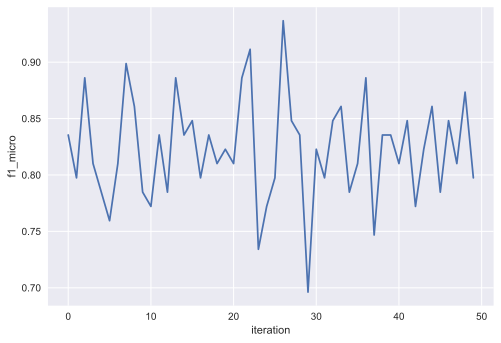

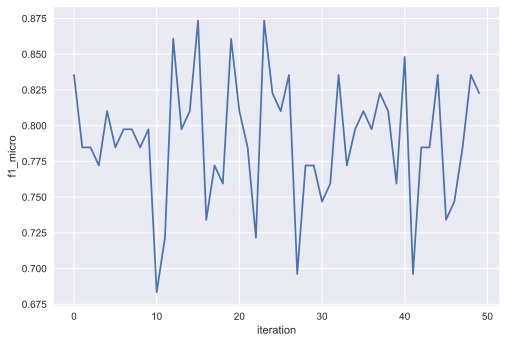

1
Accuracy: 0.96183 
Balanced accuracy: 0.90841
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.96      0.99      0.98       108

   micro avg       0.96      0.96      0.96       131
   macro avg       0.96      0.91      0.93       131
weighted avg       0.96      0.96      0.96       131

[1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1]
Из 131 математиков 111 сдали. Не сдали 20


In [46]:
math_KNN = knn_classifaer(dataset_math_bin)
passed = [x for x in math_KNN if x ==1 ]
print("Из {0} математиков {1} сдали. Не сдали {2}".format(len(math_KNN),len(passed),len(math_KNN) - len(passed)))


Train: [ 1  2  3  5  6  7  8  9 10 12]
Test: [ 0  4 11 13 14 19 23 24 39 44]


Train: [ 0  1  3  4  5  6  7  8 11 13]
Test: [ 2  9 10 12 27 30 36 50 71 74]


Train: [ 0  2  3  4  7  8  9 10 11 12]
Test: [ 1  5  6 21 25 31 37 41 45 46]


Train: [ 0  1  2  3  4  5  6  9 10 11]
Test: [ 7  8 15 16 20 22 26 32 38 42]


Train: [ 0  1  2  4  5  6  7  8  9 10]
Test: [ 3 17 18 28 29 33 34 35 40 48]


Mean score for KNN: 0.95116 
Mean score for Dummy: 0.95376


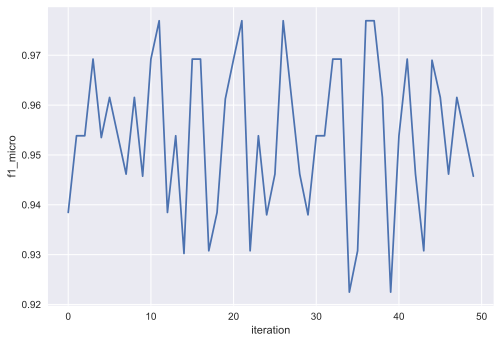

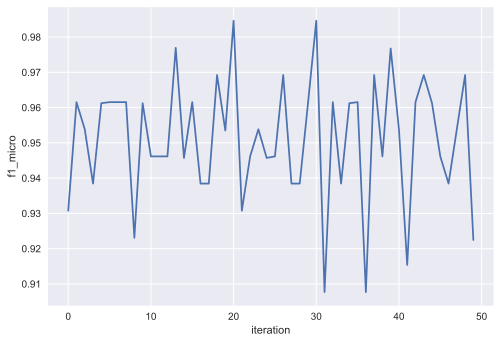

3
Accuracy: 0.9814 
Balanced accuracy: 0.81818
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.98      1.00      0.99       204

   micro avg       0.98      0.98      0.98       215
   macro avg       0.99      0.82      0.88       215
weighted avg       0.98      0.98      0.98       215

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Из 215 языковиков сдали 208. Не сдали 7


In [47]:
port_KNN = knn_classifaer(dataset_port_bin)
passed = [x for x in port_KNN if x ==1 ]
print("Из {0} языковиков сдали {1}. Не сдали {2}".format(len(port_KNN),len(passed),len(port_KNN) - len(passed)))



In [36]:
# Многоклассовая

In [37]:
def set_mark(g3):
    if g3 >= 18:
        return 5
    elif g3 >= 14:
        return 4
    elif g3 >= 8:
        return 3
    else:
        return 2
data_math_ml =  data_math.copy() 
data_por_ml = data_por.copy()
data_math_ml["final"] = data_math.g3.apply(set_mark)
data_por_ml["final"] = data_por.g3.apply(set_mark)
data_math_ml.drop(["g3","G1"], axis=1)
data_por_ml.drop(["g3","G1"], axis=1);


In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

def knn_classifaer_ml(dataset):
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['final','ID'], axis=1),
                                                dataset['final'],
                                                test_size=0.33, 
                                                random_state=1337)

#Cross-validation
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(dataset):
        print('Train:', train_index[:10])
        print('Test:', test_index[:10])
        print('\n')

    knn = KNeighborsClassifier(n_neighbors=5)
    dm = DummyClassifier(strategy='most_frequent')

    kf = KFold(n_splits=5, shuffle=True)

    scores_knn = []
    scores_dummy = []

    Data = dataset.drop(['final','ID'], axis=1)
    label = dataset['final']

    for i in range(10):
        scores_knn.extend(cross_val_score(knn, Data, label, cv=kf, scoring='f1_micro'))
        scores_dummy.extend(cross_val_score(dm, Data, label, cv=kf, scoring='f1_micro'))

    scores_dtree = np.array(scores_knn)
    scores_dummy = np.array(scores_dummy)

    del Data, label

    print('Mean score for KNN:', np.round(np.mean(scores_knn), 5),
      '\nMean score for Dummy:', np.round(np.mean(scores_dummy), 5))

    style.use('seaborn')
    pd.Series(scores_dummy).plot()
    plt.ylabel('f1_micro')
    plt.xlabel('iteration')
    plt.show()

    style.use('seaborn')
    pd.Series(scores_knn).plot()
    plt.ylabel('f1_micro')
    plt.xlabel('iteration')
    plt.show()

    knn = KNeighborsClassifier()
    params = {'n_neighbors': np.arange(1, 20, 2),
             'weights': ['uniform', 'distance']}

    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

    clf = GridSearchCV(knn, params, cv=rskf, scoring='f1_micro')


    clf.fit(dataset.drop(['final','ID'], axis=1),
            dataset['final'])
    

    knn_model_math = KNeighborsClassifier(n_neighbors=clf.best_params_.get("n_neighbors"))
    
    print(clf.best_params_.get("n_neighbors"))
    knn_model_math.fit(trainData, trainLabels)

    prediction = knn_model_math.predict(testData)
    print("Accuracy:", round(metrics.accuracy_score(testLabels, prediction), 5),
           '\nBalanced accuracy:', round(metrics.balanced_accuracy_score(testLabels, prediction), 5))
    print(metrics.classification_report(testLabels, prediction))
    return prediction


Train: [ 2  4  5  6  9 10 12 13 14 15]
Test: [ 0  1  3  7  8 11 22 26 29 35]


Train: [0 1 2 3 4 5 6 7 8 9]
Test: [18 20 21 32 38 40 41 44 52 55]


Train: [0 1 2 3 4 5 6 7 8 9]
Test: [13 15 16 24 25 33 36 46 62 67]


Train: [ 0  1  3  5  7  8  9 11 13 14]
Test: [ 2  4  6 10 12 19 27 28 31 45]


Train: [ 0  1  2  3  4  6  7  8 10 11]
Test: [ 5  9 14 17 23 30 34 37 39 47]


Mean score for KNN: 0.88709 
Mean score for Dummy: 0.56962


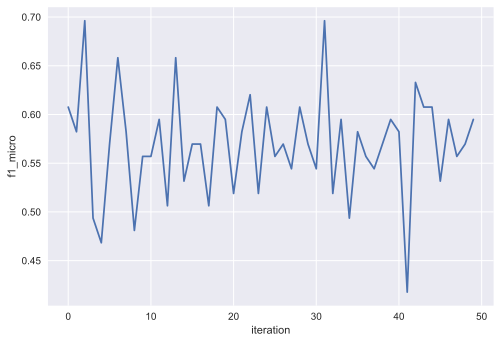

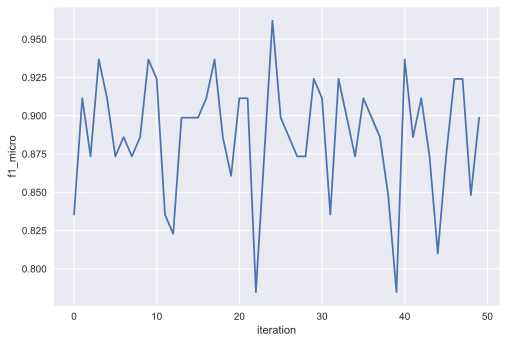

7
Accuracy: 0.91603 
Balanced accuracy: 0.70255
              precision    recall  f1-score   support

           2       0.91      0.91      0.91        23
           3       0.94      0.96      0.95        71
           4       0.86      0.94      0.90        33
           5       0.00      0.00      0.00         4

   micro avg       0.92      0.92      0.92       131
   macro avg       0.68      0.70      0.69       131
weighted avg       0.89      0.92      0.90       131



In [39]:
knn_classifaer_ml(data_math_ml.copy());

Train: [ 0  1  3  4  5  6  7  8  9 10]
Test: [ 2 14 18 20 30 34 42 43 53 59]


Train: [ 2  3  4  5  6  7  8  9 10 11]
Test: [ 0  1 13 16 22 28 29 33 36 37]


Train: [ 0  1  2  4  5  6 10 13 14 15]
Test: [ 3  7  8  9 11 12 17 24 27 39]


Train: [ 0  1  2  3  5  7  8  9 11 12]
Test: [ 4  6 10 15 25 26 35 41 55 56]


Train: [ 0  1  2  3  4  6  7  8  9 10]
Test: [ 5 19 21 23 31 32 38 40 49 51]


Mean score for KNN: 0.88969 
Mean score for Dummy: 0.65484


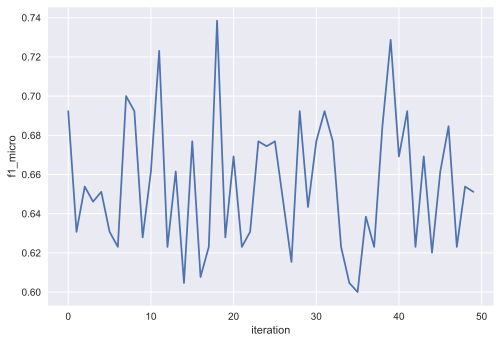

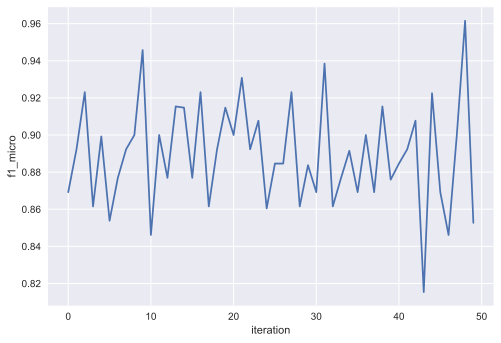

7
Accuracy: 0.91628 
Balanced accuracy: 0.69352
              precision    recall  f1-score   support

           2       1.00      0.55      0.71        11
           3       0.95      0.96      0.95       152
           4       0.81      0.93      0.87        46
           5       1.00      0.33      0.50         6

   micro avg       0.92      0.92      0.92       215
   macro avg       0.94      0.69      0.76       215
weighted avg       0.92      0.92      0.91       215



In [40]:
knn_classifaer_ml(data_por_ml.copy());

In [41]:
def log_regression_ml(dataset):
    (trainData, 
     testData, 
     trainLabels, 
     testLabels) = train_test_split(dataset.drop(['ID','final'], axis=1),
                                                dataset['final'],
                                                test_size=0.33, 
                                                random_state=42)
    lgr = LogisticRegression()
    lgr.fit(trainData, trainLabels)
    prediction = lgr.predict(testData)
    prediction

 
    
    preds_prob = lgr.predict_proba(testData)[:,1]
        
    sns.distplot(preds_prob[testLabels == 2], hist=False, rug=False, label='mark 2')
    sns.distplot(preds_prob[testLabels == 3], hist=False, rug=False, label='mark 3')
    sns.distplot(preds_prob[testLabels == 4], hist=False, rug=False, label='mark 4')
    sns.distplot(preds_prob[testLabels == 5], hist=False, rug=False, label='mark 5')

    plt.legend()
    plt.show()
    print("Accuracy:", round(metrics.accuracy_score(testLabels, prediction), 5),
      '\nBalanced accuracy:', round(metrics.balanced_accuracy_score(testLabels, prediction), 5))

    print()
    print(metrics.classification_report(testLabels, prediction))


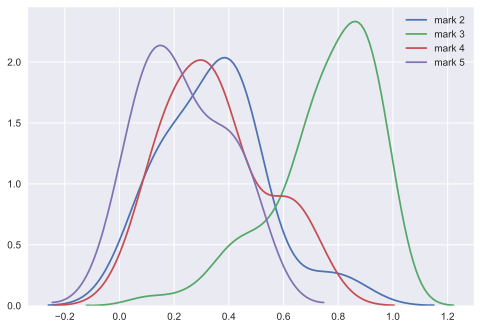

Accuracy: 0.82443 
Balanced accuracy: 0.61179

              precision    recall  f1-score   support

           2       1.00      0.92      0.96        25
           3       0.90      0.88      0.89        80
           4       0.56      0.65      0.60        23
           5       0.00      0.00      0.00         3

   micro avg       0.82      0.82      0.82       131
   macro avg       0.61      0.61      0.61       131
weighted avg       0.84      0.82      0.83       131



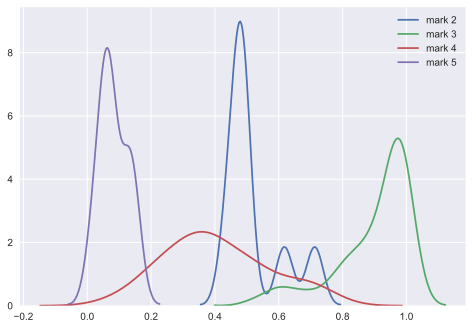

Accuracy: 0.88372 
Balanced accuracy: 0.61667

              precision    recall  f1-score   support

           2       1.00      0.75      0.86         8
           3       0.88      1.00      0.94       141
           4       0.88      0.72      0.79        60
           5       0.00      0.00      0.00         6

   micro avg       0.88      0.88      0.88       215
   macro avg       0.69      0.62      0.65       215
weighted avg       0.86      0.88      0.87       215



In [42]:
log_regression_ml(data_math_ml)
log_regression_ml(data_por_ml)